# Mini Programming Assignment: Implement a Recursive Algorithm

**Name:** Ben Prescott

**Date:** 07/09/2021

**Course:** MSDS432 Summer 2021

#### Executive Summary

**Description:**

This notebook provides a comparison of execution speeds for finding the factorial of ten randomly generated numbers, using both a recursive algorithm and an iterative 'for loop'. The results are compared in a table and plotted on a visual graph. 

**Algorithm Explanation**

The two algorithms used in this scenario are a recursive algorithm and an iterative algorithm (using a for loop). The iterative algorithm leverages an internal loop to check if conditions have been met. If not, the loop within the function will continue until conditions have been satisfied. A single call is made to the function that runs the iterative loop.

With a recursive algorithm, the loop that occurs is a new call made back to itself with a new value, known as the algorithm's 'recursive case'. The function continues to check against some conditions, known as the 'base case', repeating the calling of itself until the base case has been satisfied. The base case ensures that the recursive algorithm does not continue into an infinite loop.    

**Approach**

I started by creating a single array, 'array10', made up of ten random integers between the numbers 100 and 900. I expanded the initial range of 100-500 to emphasize the changes in execution times with larger values. I then created two dictionaries that will hold each random number from the generator as the dictionary key, and the execution times and factorials each key's values. I leveraged the 'decimal' library to help with converting factorial values that can be added to a Pandas DataFrame, as some factorial values were too large for the DataFrame.

Each of the numbers from the array were then sent to the recursive algorithm to determine the number's factorial, as well as the iterative algorithm. The execution times were tracked for both algorithms and added to the dictionaries. For easier use, both the recursive and iterative algorithm's outputs were added to separate DataFrames, then merged using their matching index values. An additional column was added to the DataFrame to show the difference between the recursive and iterative algorithm execution times.

Once the DataFrame was populated, it was then sorted in ascending order based on the random numbers, then plotted for a visual comparison of execution times. 

**Results**

Both algorithms displayed a decrease in execution speed as the number increased, alluding to a longer loop to determine the number's factorial. The smaller the number the smaller the gap between the recursive and iterative execution times, with the difference between the algorithms growing as the number grew larger. This was most noticeable after the number 600, showing that recursive execution times can become noticeably slower.

Based on the results of this test, the iterative algorithm (for loop) displays execution speeds twice as fast as the recursive algorithm, making the iterative algorithm more efficient. However, the recursive algorithm is much simpler and easier to read from a code perspective, creating the argument of code simplicity vs execution time.

In [579]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
from timeit import default_timer as timer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [244]:
def fact(x):
    if x == 1:
        return 1
    else:
        return x * fact(x-1)

print(fact(5))

def fact_iter(x):
    ans = 1    
    for i in range(1,x+1):
        ans = ans * i
    return ans

120


In [567]:
np.random.seed(10) # Setting random seed for repeatable array creation
array10 = list(np.random.randint(100,900,10)) # Creating a random 10-number array with numbers between 100-900 

In [574]:
# Looping over the numbers in the array and retrieving the factorial for each using the iterative loop
# Storing just the execution time, as the factorial used in the final table will be retrieved from the recursive algorithm
loop_dict = {}
for num in array10:
    start = timer()
    factor = fact_iter(num)
    stop = timer()
    loop_dict[num] = (stop-start)

In [575]:
# Looping over the numbers in the array and retrieving the factorial and execution time using the recursive algorithm
# Using the Decimal library to help with a data type that can provide the entire factorial in a Pandas DataFrame
recur_dict = {}
for num in array10:
    n = num.item()
    start = timer()
    factor = fact(n)
    stop = timer()
    recur_dict[n] = Decimal(factor), (stop-start)

In [576]:
# Creating a Pandas DataFrame with the factorial, recursion times, iterative loop times, and the difference between both algorithms
pd.set_option("display.precision", 20)
recur_table = pd.DataFrame.from_dict(recur_dict, orient='index', columns=['Factorial','Recursion Times'])
loop_table = pd.DataFrame.from_dict(loop_dict, orient='index', columns=['Loop Times'])
merged_table = recur_table.merge(loop_table, left_index=True, right_index=True)
merged_table['Time Differences'] = merged_table['Recursion Times'] - merged_table['Loop Times']
merged_table.sort_index(inplace=True)
merged_table

,Factorial,Recursion Times,Loop Times,Time Differences
108,1324641819451828974499891837121832599810209360...,0.00003329999890411273,0.00001599999995960388,0.00001729999894450884
223,2498731854354364303776989870596633623950866289...,0.00007759999971312936,0.00003780000042752363,0.00003979999928560574
225,1259360854594599609103602894780703346471236610...,0.00007989999903657008,0.00004099999932805076,0.00003889999970851932
256,8578177753428426541190822716812326251577815202...,0.00009109999882639386,0.00004570000055537093,0.00004539999827102292
365,2510412867555873229292944374881202770516552026...,0.00019330000031914096,0.00010130000009667128,0.00009200000022246968
420,1179832395293178259148587778443982767423908163...,0.00018689999888010789,0.00010010000005422626,0.00008679999882588163
469,6771809666814951090078098205921092630097304291...,0.00021019999985583127,0.00011509999967529438,0.00009510000018053688
596,9863552906103574591278174425939831505001979645...,0.00032550000105402432,0.00019249999968451448,0.00013300000136950985
627,2409291638126018016049747953956434843784516403...,0.00056179999955929816,0.00023719999990134966,0.00032459999965794850
833,9759748538709431268777250937530762690468490994...,0.00062630000138597097,0.00040629999966768082,0.00022000000171829015


<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Recursive vs Iterative Algorithm - Execution Times')

Text(0.5, 0, 'Number')

Text(0, 0.5, 'Execution Time')

[]

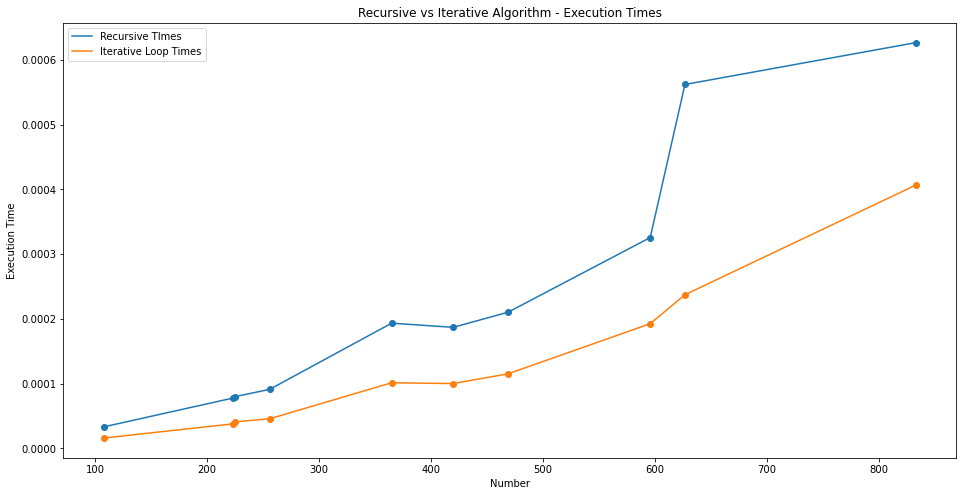

In [584]:
# Plotting the execution times by algorithm for each number in the array
plt.figure(figsize=(16,8))
plt.plot(merged_table['Recursion Times'], label='Recursive TImes')
plt.scatter(merged_table.index, merged_table['Recursion Times'])
plt.plot(merged_table['Loop Times'], label='Iterative Loop Times')
plt.scatter(merged_table.index, merged_table['Loop Times'])
plt.title('Recursive vs Iterative Algorithm - Execution Times')
plt.xlabel('Number')
plt.ylabel('Execution Time')
plt.legend()
plt.plot()